# Лабораторные работы по "Теория передачи информации"

In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

## Лабораторная №1

Задание:

В соответствии с заданным законом распределения сгенерировать выборку размером $10^4$, оценить плотность вероятности с помощью непараметрических методов: гистограммы и ядерной оценки плотности. Для сравнения на один график нанести аналитическую зависимость и получившиеся оценки

Распределение Парето: 

$𝑓_𝑋(𝑥; 𝑥_𝑚,𝑘)=\frac{𝑘 𝑥_𝑚^𝑘}{𝑥 𝑘+1}$
 , $𝑥≥𝑥_𝑚$ c параметрами $𝑥_𝑚=1$ и $𝑘=1.2$. 

In [2]:
# Параметры
N = 10**3
k = 1.2
x_m = 1
h = 0.4

In [3]:
def pdf(x, k=k, x_m=x_m):
    return k * (x_m**k) / x**(k + 1)


def cdf_reverse(u, k=k, x_m=x_m):
    return x_m / (1 - u)**(1 / k)

In [4]:
def gauss(x):
    return np.exp(- (x**2) / 2) / np.sqrt(2 * np.pi)

def kde(x, u, h=h):
    result = []
    n = len(x)
    for ui in  u:
        s = 0
        for xj in x:
            s += gauss((ui - xj) / h)
        result.append(s / (n * h))
    return np.array(result)

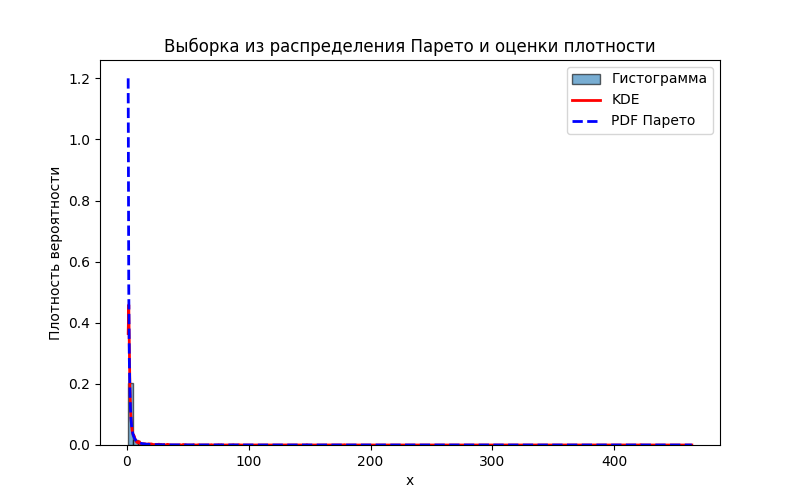

In [10]:
U = np.random.uniform(0, 1, N)
X = cdf_reverse(U)

x_r = np.linspace(x_m, np.max(X) * 1.1, N)

kde_v = kde(X, x_r)

fig, ax = plt.subplots(figsize=(8,5))

ax.hist(X, bins=100, density=True, alpha=0.6, edgecolor='black', label='Гистограмма')
ax.plot(x_r, kde_v, 'r-', lw=2, label='KDE')
ax.plot(x_r, pdf(x_r, k, x_m), 'b--', lw=2, label='PDF Парето')

ax.set_title('Выборка из распределения Парето и оценки плотности')
ax.set_xlabel('x')
ax.set_ylabel('Плотность вероятности')

ax.legend()
plt.show()

## Лабораторная работа № 2